Code to implement and plot results from tree-based models

In [4]:
#Import required modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, sklearn as sk, scipy

In [5]:
#Load in feature and label data
features = pd.read_csv('all_feature_data.csv')
labels = pd.read_csv('all_label_data.csv')
features = features.drop(columns = ['Unnamed: 0'])
labels = labels.drop(columns = ['Unnamed: 0'])

In [6]:
#Remove data points with more than half of features missing
dropidxs = []
for i in range(features.shape[0]):
  if pd.isnull(features).sum(axis = 1)[i] > 0.5*features.shape[1]:
    dropidxs.append(i)
print('Dropping ' + str(len(dropidxs)) + ' data points due to missing data')

features = features.drop(index = dropidxs).reset_index(drop=True)
labels = labels.drop(index = dropidxs).reset_index(drop=True)

Dropping 75 data points due to missing data


Train/Test/Validate Split

In [7]:
from numpy import random
#Set random seed for reproducible results
np.random.seed(1)

In [8]:
#Randomly select indices for training, validation, and testing data

other_indices = []
test_indices = []
validate_indices = []
train_indices = []

#Get train indices randomly (60% of dataset)
while len(train_indices) < int(np.round(features.shape[0] * 0.6)):
  i = np.random.randint(0, features.shape[0])
  if i not in train_indices:
    train_indices.append(i)

#Get indices not in train_indices
for i in range(features.shape[0]):
  if i not in train_indices:
    other_indices.append(i)

#Split other_indices into validate indices and test indices evenly
while len(validate_indices) < int(np.round(len(other_indices) * 0.5)):
  i = np.random.randint(0, len(other_indices))
  if other_indices[i] not in validate_indices:
    validate_indices.append(other_indices[i])

for i in range(len(other_indices)):
  if other_indices[i] not in validate_indices:
    test_indices.append(other_indices[i])

#Convert indices to numpy arrays
train_indices = np.array(train_indices)
validate_indices = np.array(validate_indices)
test_indices = np.array(test_indices)

#Make array containing train and validate indices
train_and_validate_indices = []
train_and_validate_indices.extend(train_indices)
train_and_validate_indices.extend(validate_indices)

Standardize Data

In [9]:
#Split into training, validation, and testing features and labels
training_features_array = features.iloc[train_indices].values
training_labels_array = labels.iloc[train_indices, 1:].values
validate_features_array = features.iloc[validate_indices].values
validate_labels_array = labels.iloc[validate_indices, 1:].values
testing_features_array = features.iloc[test_indices].values 
testing_labels_array = labels.iloc[test_indices, 1:].values

#Standardize data
from sklearn.preprocessing import StandardScaler
all_features_array_scaled = StandardScaler().fit(np.array(features)).transform(np.array(features))

#Get standardized training, validation, and testing features
training_features_array_scaled = all_features_array_scaled[train_indices, :]
validate_features_array_scaled = all_features_array_scaled[validate_indices, :]
testing_features_array_scaled = all_features_array_scaled[test_indices, :]

Decision Tree fit with full feature set, unscaled data, L1/L2 criterion

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


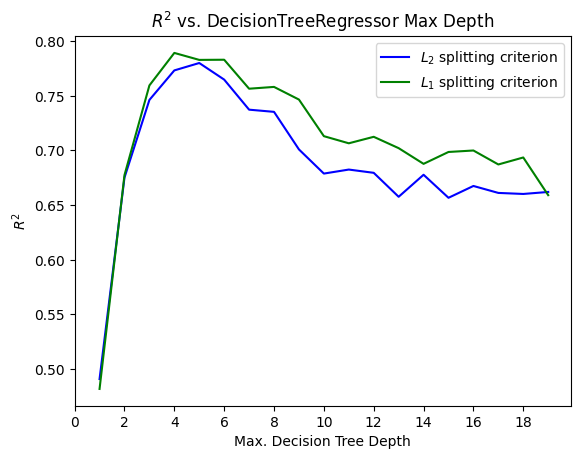

In [11]:
from sklearn.tree import DecisionTreeRegressor

#Iterate through max. tree depths for decision tree regressor with l2 splitting criterion (finding mean of labels in leaf node)
#Keep all other parameters at Sklearn default values
scoresl2 = []
for maxdepth in range(1, 20):
  dt = DecisionTreeRegressor(max_depth = maxdepth, random_state = 1).fit(training_features_array, training_labels_array[:, 0])
  scoresl2.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

#Iterate through max. tree depths for decision tree regressor with l1 splitting criterion (finding median of labels in leaf node)
#Keep all other parameters at Sklearn default values
scoresl1 = []
for maxdepth in range(1, 20):
  print(maxdepth)
  dt = DecisionTreeRegressor(max_depth = maxdepth, random_state = 1, criterion = 'absolute_error').fit(training_features_array, training_labels_array[:, 0])
  scoresl1.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

plt.plot(np.arange(1, 20), scoresl2, 'b', label = r'$L_2$ splitting criterion')
plt.plot(np.arange(1, 20), scoresl1, 'g', label = r'$L_1$ splitting criterion')
plt.xlabel('Max. Decision Tree Depth')
plt.xticks(np.arange(0, 19, 2))
plt.ylabel(r'$R^2$')
plt.title(r'$R^2$ vs. DecisionTreeRegressor Max Depth')
plt.legend()

Random Forest with full feature set, unscaled data, L1/L2 criterion [Bagged Trees]

2
3
4
5
6
2
3
4
5
6
2
3
4
5
6
2
3
4
5
6


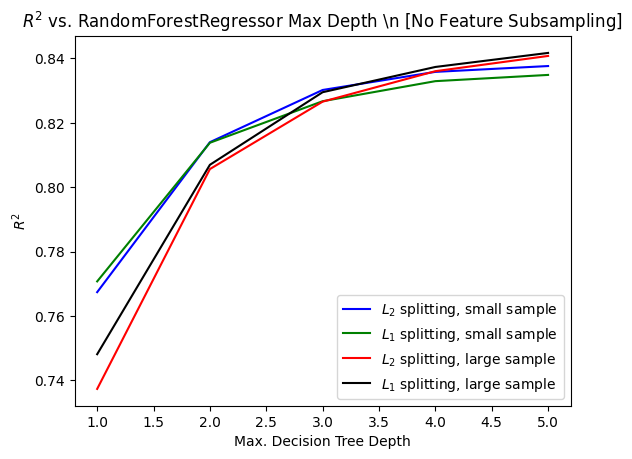

In [15]:
from sklearn.ensemble import RandomForestRegressor

#Run random forest regressor for 5 max_depth values with no feature subsampling, L2 splitting criterion
#Use bootstrapping with 0.2*(# of samples)
scoresl2_smallsample = []
for maxdepth in range(2, 7):
  print(maxdepth)
  dt = RandomForestRegressor(n_estimators = 50, bootstrap=True, random_state = 1, max_depth = maxdepth, max_samples = 0.2).fit(training_features_array, training_labels_array[:, 0])
  scoresl2_smallsample.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

#Run random forest regressor for 5 max_depth values with no feature subsampling, L1 splitting criterion
#Use bootstrapping with 0.2*(# of samples)
scoresl1_smallsample = []
for maxdepth in range(2, 7):
  print(maxdepth)
  dt = RandomForestRegressor(n_estimators = 50, bootstrap=True, random_state = 1, max_depth = maxdepth, max_samples = 0.2, criterion = 'absolute_error').fit(training_features_array, training_labels_array[:, 0])
  scoresl1_smallsample.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

#Run random forest regressor for 5 max_depth values with no feature subsampling, L2 splitting criterion
#Use bootstrapping with 0.7*(# of samples)
scoresl2_largesample = []
for maxdepth in range(2, 7):
  print(maxdepth)
  dt = RandomForestRegressor(n_estimators = 50, bootstrap=True, random_state = 1, max_depth = maxdepth, max_samples = 0.7).fit(training_features_array, training_labels_array[:, 0])
  scoresl2_largesample.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

#Run random forest regressor for 5 max_depth values with no feature subsampling, L1 splitting criterion
#Use bootstrapping with 0.7*(# of samples)
scoresl1_largesample = []
for maxdepth in range(2, 7):
  print(maxdepth)
  dt = RandomForestRegressor(n_estimators = 50, bootstrap=True, random_state = 1, max_depth = maxdepth, max_samples = 0.7, criterion = 'absolute_error').fit(training_features_array, training_labels_array[:, 0])
  scoresl1_largesample.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

#Plot results
plt.plot(np.arange(1, 6), scoresl2_smallsample, 'b', label = r'$L_2$ splitting, small sample')
plt.plot(np.arange(1, 6), scoresl1_smallsample, 'g', label = r'$L_1$ splitting, small sample')
plt.plot(np.arange(1, 6), scoresl2_largesample, 'r', label = r'$L_2$ splitting, large sample')
plt.plot(np.arange(1, 6), scoresl1_largesample, 'k', label = r'$L_1$ splitting, large sample')
plt.xlabel('Max. Decision Tree Depth')
plt.ylabel(r'$R^2$')
plt.title(r'$R^2$ vs. RandomForestRegressor Max Depth \n [No Feature Subsampling]')
plt.legend()

Random Forest with subset of features and samples, unscaled data, L1/L2 criterion 

2
3
4
5
6
2
3
4
5
6
2
3
4
5
6
2
3
4
5
6


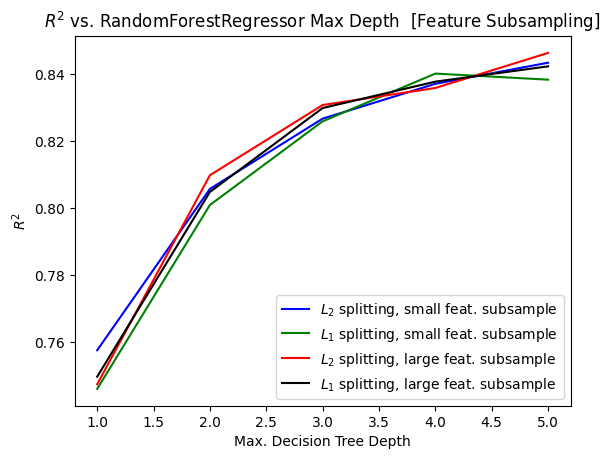

In [17]:
from sklearn.ensemble import RandomForestRegressor

#Run random forest regressor for 5 max_depth values with no feature subsampling, L2 splitting criterion
#Use bootstrapping with 0.7*(# of samples)
#Subsample 0.2*(# of features)
scoresl2_small_feat_sub = []
for maxdepth in range(2, 7):
  print(maxdepth)
  dt = RandomForestRegressor(n_estimators = 50, bootstrap = True, random_state = 1, max_depth = maxdepth, max_samples = 0.7, max_features = 0.2).fit(training_features_array, training_labels_array[:, 0])
  scoresl2_small_feat_sub.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

#Run random forest regressor for 5 max_depth values with no feature subsampling, L1 splitting criterion
#Use bootstrapping with 0.7*(# of samples)
#Subsample 0.2*(# of features)
scoresl1_small_feat_sub = []
for maxdepth in range(2, 7):
  print(maxdepth)
  dt = RandomForestRegressor(n_estimators = 50, bootstrap = True, random_state = 1, max_depth = maxdepth, max_samples = 0.7, max_features = 0.2, criterion = 'absolute_error').fit(training_features_array, training_labels_array[:, 0])
  scoresl1_small_feat_sub.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

#Run random forest regressor for 5 max_depth values with no feature subsampling, L2 splitting criterion
#Use bootstrapping with 0.7*(# of samples)
#Subsample 0.7*(# of features)
scoresl2_large_feat_sub = []
for maxdepth in range(2, 7):
  print(maxdepth)
  dt = RandomForestRegressor(n_estimators = 50, bootstrap = True, random_state = 1, max_depth = maxdepth, max_samples = 0.7, max_features = 0.7).fit(training_features_array, training_labels_array[:, 0])
  scoresl2_large_feat_sub.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

#Run random forest regressor for 5 max_depth values with no feature subsampling, L1 splitting criterion
#Use bootstrapping with 0.7*(# of samples)
#Subsample 0.7*(# of features)
scoresl1_large_feat_sub = []
for maxdepth in range(2, 7):
  print(maxdepth)
  dt = RandomForestRegressor(n_estimators = 50, bootstrap = True, random_state = 1, max_depth = maxdepth, max_samples = 0.7, max_features = 0.7, criterion = 'absolute_error').fit(training_features_array, training_labels_array[:, 0])
  scoresl1_large_feat_sub.append(dt.score(validate_features_array, validate_labels_array[:, 0]))

plt.plot(np.arange(1, 6), scoresl2_small_feat_sub, 'b', label = r'$L_2$ splitting, small feat. subsample')
plt.plot(np.arange(1, 6), scoresl1_small_feat_sub, 'g', label = r'$L_1$ splitting, small feat. subsample')
plt.plot(np.arange(1, 6), scoresl2_large_feat_sub, 'r', label = r'$L_2$ splitting, large feat. subsample')
plt.plot(np.arange(1, 6), scoresl1_large_feat_sub, 'k', label = r'$L_1$ splitting, large feat. subsample')
plt.xlabel('Max. Decision Tree Depth')
plt.ylabel(r'$R^2$')
plt.title(r'$R^2$ vs. RandomForestRegressor Max Depth  [Feature Subsampling]')
plt.legend()

Get Feature Importances from Decision Tree

In [23]:
#Create DecisionTreeRegressor with optimal parameters
dt_model = DecisionTreeRegressor(max_depth = 4, random_state = 1, criterion = 'absolute_error').fit(training_features_array, training_labels_array[:, 0])
validate_dt_predictions = dt_model.predict(validate_features_array)

In [29]:
#Get feature importances from decision tree
feature_scores_dt = pd.Series(dt_model.feature_importances_, index=features.columns).sort_values(ascending=False)
feature_scores_dt

ws8001            0.754187
wssfc1            0.123065
usfc1             0.057473
u8001             0.048401
u8006             0.007993
                    ...   
usfc25            0.000000
usfc24            0.000000
usfc34            0.000000
usfc35            0.000000
wd_6hrchange_W    0.000000
Length: 217, dtype: float64

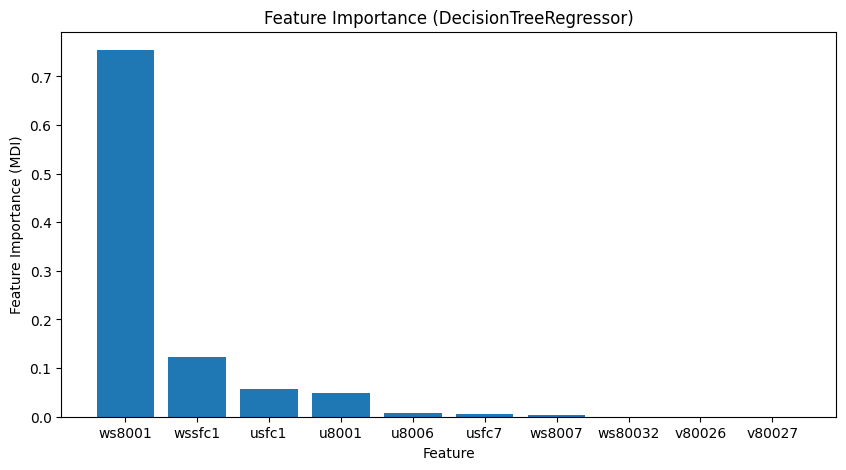

In [44]:
#Plot feature importances from decision tree
plt.figure(figsize = [10, 5])
top_ten_features_dt = feature_scores_dt.sort_values(ascending=False).head(10)

plt.bar(top_ten_features_dt.index, top_ten_features_dt)
plt.xlabel('Feature')
plt.ylabel('Feature Importance (MDI)')
plt.title("Feature Importance (DecisionTreeRegressor)")
plt.show()

Get Feature Importances from Random Forest

In [39]:
#Get random forest model with optimal parameters
rf_model = RandomForestRegressor(n_estimators = 50, bootstrap=True, max_samples=0.7, max_features=0.7,  random_state=1,  max_depth=5).fit(training_features_array, training_labels_array[:, 0])


In [47]:
#Get optimal RF model score
rf_model.score(testing_features_array, testing_labels_array[:, 0])

0.8499648297741461

In [40]:
feature_scores_rf = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
feature_scores_rf

ws8001            0.522655
ws8002            0.113625
ws8004            0.085744
usfc1             0.058608
u8001             0.047659
                    ...   
year              0.000000
tsfc3             0.000000
td8006            0.000000
td8005            0.000000
wd_6hrchange_W    0.000000
Length: 217, dtype: float64

Visualize feature importance for RandomForestRegressor

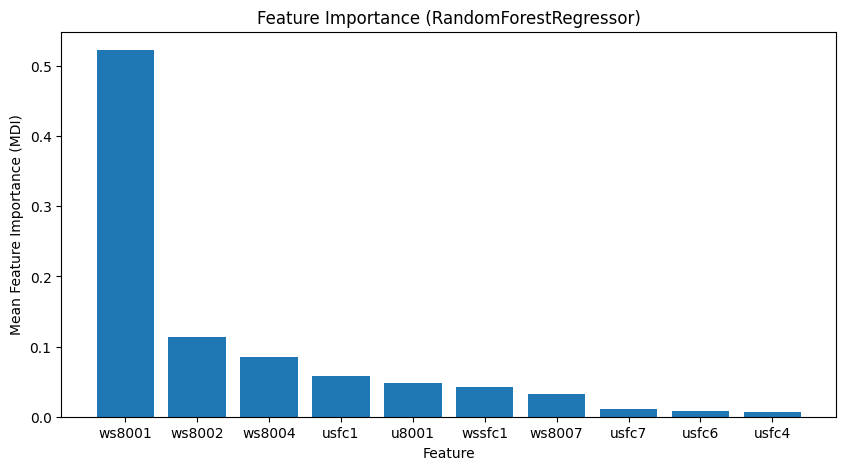

In [45]:
#Plot feature importances from decision tree
plt.figure(figsize = [10, 5])
top_ten_features_rf = feature_scores_rf.sort_values(ascending=False).head(10)

plt.bar(top_ten_features_rf.index, top_ten_features_rf)
plt.xlabel('Feature')
plt.ylabel('Mean Feature Importance (MDI)')
plt.title("Feature Importance (RandomForestRegressor)")
plt.show()